<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/CS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
# Loading dataset
loan = pd.read_csv(r"/content/loan_borowwer_data.csv")

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9635797dd0>,
      dtype=object)

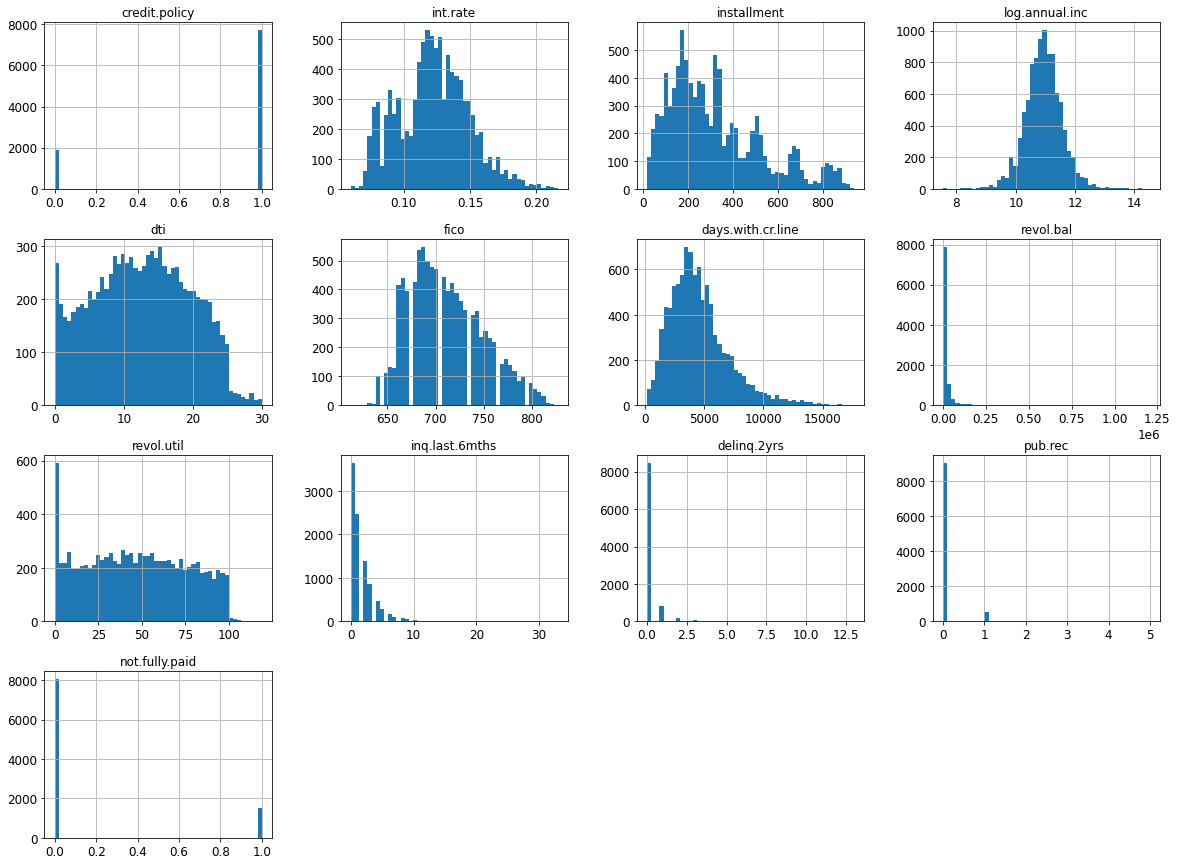

In [4]:
%matplotlib inline

loan.hist(bins=50, figsize=(20,15))

In [5]:
#loan['credit.policy'] = loan['credit.policy'].astype('category')

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(loan, loan['purpose']):
    strat_train_set = loan.loc[train_index]
    strat_test_set = loan.loc[test_index]

In [7]:
loan = strat_train_set.drop('not.fully.paid', axis=1) # drop labels for training set
loan_labels = strat_train_set['not.fully.paid'].copy()

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

loan_num = loan.select_dtypes(include=numerics)

#### There is no missing values

In [9]:
loan_cat = loan['purpose']

In [10]:
loan_cat.head()

2776    debt_consolidation
1467           credit_card
8790      home_improvement
163       home_improvement
6093    debt_consolidation
Name: purpose, dtype: object

In [11]:
loan_cat_encoded, loan_categories = loan_cat.factorize()
loan_cat_encoded[:10]

array([0, 1, 2, 2, 0, 3, 4, 4, 5, 0])

In [12]:
loan_categories

Index(['debt_consolidation', 'credit_card', 'home_improvement', 'educational',
       'small_business', 'all_other', 'major_purchase'],
      dtype='object')

**Warning**: earlier versions of the book used the `LabelEncoder` class instead of Pandas' `factorize()` method. This was incorrect: indeed, as its name suggests, the `LabelEncoder` class was designed for labels, not for input features. The code worked because we were handling a single categorical input feature, but it would break if you passed multiple categorical input features.

We can convert each categorical value to a one-hot vector using a `OneHotEncoder`:

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
loan_cat_1hot = encoder.fit_transform(loan_cat_encoded.reshape(-1,1))
loan_cat_1hot

<7662x7 sparse matrix of type '<class 'numpy.float64'>'
	with 7662 stored elements in Compressed Sparse Row format>

The OneHotEncoder returns a sparse array by default, but we can convert it to a dense array if needed:

In [14]:
loan_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

<b><font color = "red">feature </font></b>is <i>input</i>; <b><font color = "red">label </font></b> is <i>output</i>.

A feature is one column of the data in your input set. For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.

Once you've trained your model, you will give it sets of new input containing those features; it will return the predicted "label" (pet type) for that person.

In [15]:
'''
import category_encoders as ce
encoder = ce.OneHotEncoder()
loan_cat_1hot = encoder.fit_transform(loan_cat_encoded)
'''

'\nimport category_encoders as ce\nencoder = ce.OneHotEncoder()\nloan_cat_1hot = encoder.fit_transform(loan_cat_encoded)\n'

In [17]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 395 kB/s 


In [21]:
# We can escape factorize method using CategoricalEncoder
import category_encoders as ce
cat_encoder = ce.BinaryEncoder()
loan_cat_reshaped = loan_cat.values.reshape(-1, 1)
loan_cat_1hot = cat_encoder.fit_transform(loan_cat_reshaped)
loan_cat_1hot

,0_0,0_1,0_2
0,0,0,1
1,0,1,0
2,0,1,1
3,0,1,1
4,0,0,1
...,...,...,...
7657,1,1,0
7658,0,1,0
7659,0,1,1
7660,0,0,1


In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662 entries, 2776 to 1431
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7662 non-null   int64  
 1   purpose            7662 non-null   object 
 2   int.rate           7662 non-null   float64
 3   installment        7662 non-null   float64
 4   log.annual.inc     7662 non-null   float64
 5   dti                7662 non-null   float64
 6   fico               7662 non-null   int64  
 7   days.with.cr.line  7662 non-null   float64
 8   revol.bal          7662 non-null   int64  
 9   revol.util         7662 non-null   float64
 10  inq.last.6mths     7662 non-null   int64  
 11  delinq.2yrs        7662 non-null   int64  
 12  pub.rec            7662 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 838.0+ KB


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [31]:
loan_num_tr = num_pipeline.fit_transform(loan_num)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [33]:
num_attribs = list(loan_num.columns)
cat_attribs = ['purpose']

In [38]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', TargetEncoder(encoding="onehot-dense")),
    ])

NameError: ignored

In [35]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

NameError: ignored

In [ ]:
loan_prepared = full_pipeline.fit_transform(loan)
loan_prepared.shape

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
def scores(classifier, X_train, y_train):
    cvs = cross_val_score(classifier, X_train, y_train, cv=3, scoring="accuracy")
    print(f"cross_val_score: {cvs}")
    y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=3)
    precission = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f"Precission: {precission} \nRecall: {recall} \nF1 Score: {f1}")
classification_scores = lambda classifier: scores(classifier, loan_prepared, loan_labels)

In [ ]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier
classifier = SGDClassifier(random_state=42, max_iter=11)
classification_scores(classifier)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classification_scores(classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classification_scores(classifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classification_scores(classifier)

In [ ]:
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier()
classification_scores(classifier)

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classification_scores(classifier)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classification_scores(classifier)

### Based on F1 score, choosing DecisionTreeClassifier for our problem. 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_test = strat_test_set.drop('not.fully.paid', axis=1) # drop labels for training set
y_test = strat_test_set['not.fully.paid'].copy()
X_test = full_pipeline.fit_transform(X_test)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(loan_prepared, loan_labels)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

### Let's try with 2nd best classifier

In [ ]:
classifier = SGDClassifier(random_state=42, max_iter=11)
classifier.fit(loan_prepared, loan_labels)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

### Strange, SGD prediction is better than DecisionTreeClassifier. Let's try for Random Forest

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(loan_prepared, loan_labels)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

In [ ]:
classifier = SVC()
classifier.fit(loan_prepared, loan_labels)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

### I think, I would need more data for classification. 